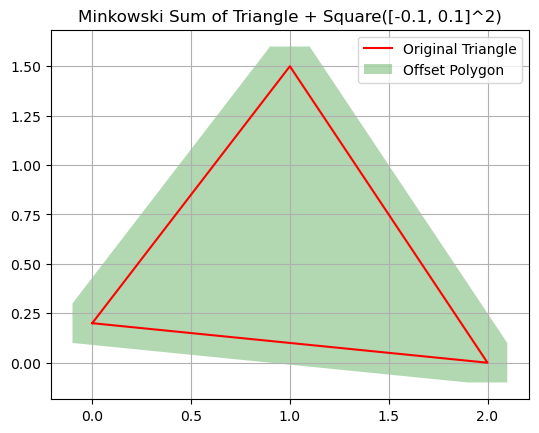

In [6]:
import matplotlib.pyplot as plt

def cross2D(a, b):
    """
    2D cross product of vectors a and b, each a tuple (x, y).
    cross2D(a, b) = a.x*b.y - a.y*b.x
    """
    return a[0]*b[1] - a[1]*b[0]

def monotone_chain(points):
    """
    Constructs the convex hull of a set of 2D points using the monotone chain algorithm.
    Returns the hull as a list of vertices in CCW order (without repeating the first point).
    """
    # Sort the points by x, then by y
    points = sorted(points)

    # Build the lower hull
    lower = []
    for p in points:
        while len(lower) >= 2 and cross2D((lower[-1][0] - lower[-2][0],
                                           lower[-1][1] - lower[-2][1]),
                                          (p[0] - lower[-1][0],
                                           p[1] - lower[-1][1])) <= 0:
            lower.pop()
        lower.append(p)

    # Build the upper hull
    upper = []
    for p in reversed(points):
        while len(upper) >= 2 and cross2D((upper[-1][0] - upper[-2][0],
                                           upper[-1][1] - upper[-2][1]),
                                          (p[0] - upper[-1][0],
                                           p[1] - upper[-1][1])) <= 0:
            upper.pop()
        upper.append(p)

    # Remove the last element of each list (it's the starting point of the other list)
    lower.pop()
    upper.pop()

    # Concatenate lower and upper hull to get full hull in CCW order
    hull = lower + upper
    return hull

def grow_triangle_linf(triangle, amount):
    """
    Given a triangle (list of 3 points [(x0, y0), (x1, y1), (x2, y2)])
    and 'amount' (the half-width of the axis-aligned square),
    compute the Minkowski sum:
       triangle ⊕ [−amount, amount]^2
    Returns the resulting convex polygon as a list of vertices (tuples) in CCW order.
    """
    # 1) Create the 4 corners of the axis-aligned square (centered at origin)
    square_corners = [
        (-amount, -amount),
        (-amount,  amount),
        ( amount, -amount),
        ( amount,  amount)
    ]

    # 2) Generate all candidate points: 3 triangle vertices x 4 square corners = 12 points
    candidate_points = []
    for t in triangle:
        for c in square_corners:
            candidate_points.append((t[0] + c[0], t[1] + c[1]))

    # 3) Compute the convex hull of those 12 points
    hull = monotone_chain(candidate_points)

    return hull

def plot_polygon(ax, polygon, style='k-', fill=False, alpha=1.0, label=None):
    """
    Utility to plot a polygon (list of (x, y)) onto an axes.
    style: matplotlib line style
    fill:  whether to fill the polygon
    alpha: transparency
    label: legend label
    """
    # Close the polygon by repeating the first point
    if not polygon:
        return
    px = [p[0] for p in polygon] + [polygon[0][0]]
    py = [p[1] for p in polygon] + [polygon[0][1]]

    if fill:
        ax.fill(px, py, style[0] if style else 'k', alpha=alpha, label=label)
    else:
        ax.plot(px, py, style, alpha=alpha, label=label)


def main():
    # Example: define a triangle in 2D
    triangle = [
        (0.0, 0.2),
        (2.0, 0.0),
        (1.0, 1.5)
    ]
    amount = 0.1  # half-width of the axis-aligned square

    # Compute the Minkowski-sum offset polygon
    offset_polygon = grow_triangle_linf(triangle, amount)

    # ~ Visualization ~
    fig, ax = plt.subplots()
    ax.set_aspect('equal', 'box')
    ax.set_title(f"Minkowski Sum of Triangle + Square([-{amount}, {amount}]^2)")

    # Plot original triangle
    plot_polygon(ax, triangle, style='r-', fill=False, label="Original Triangle")

    # Plot offset polygon
    plot_polygon(ax, offset_polygon, style='g-', fill=True, alpha=0.3, label="Offset Polygon")

    # Show some info
    ax.legend()
    ax.grid(True)
    plt.show()


if __name__ == "__main__":
    main()
